In [1]:
# Mnist Digits ClassIfication
# import libs

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import choice
from warnings import filterwarnings
import os
filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
# Load Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

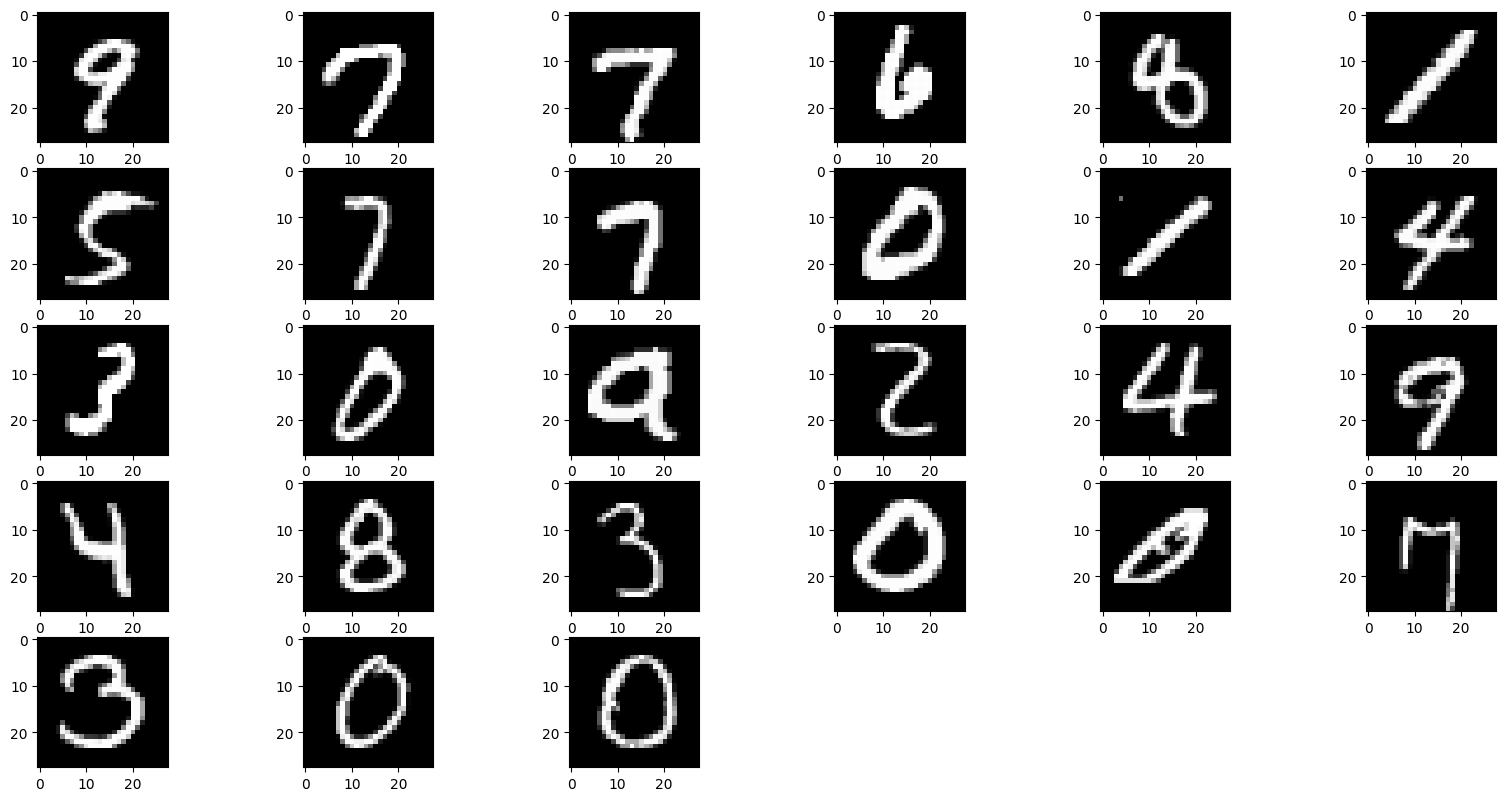

In [3]:
# Sample Data
fig = plt.figure(figsize=(20, 10), dpi=100)
for i in range(1, 28):
    ax = plt.subplot(5, 6, i)
    x = choice(x_train)
    ax.imshow(x, cmap="gray")

In [4]:
# Model Create And Compile 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0121 14:57:55.624693 139941320165184 deprecation.py:506] From /home/navdeep/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# Train And Eval Model
model.fit(x_train, y_train, epochs=1)
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.1154 - acc: 0.9631


[0.11538916521817445, 0.9631]

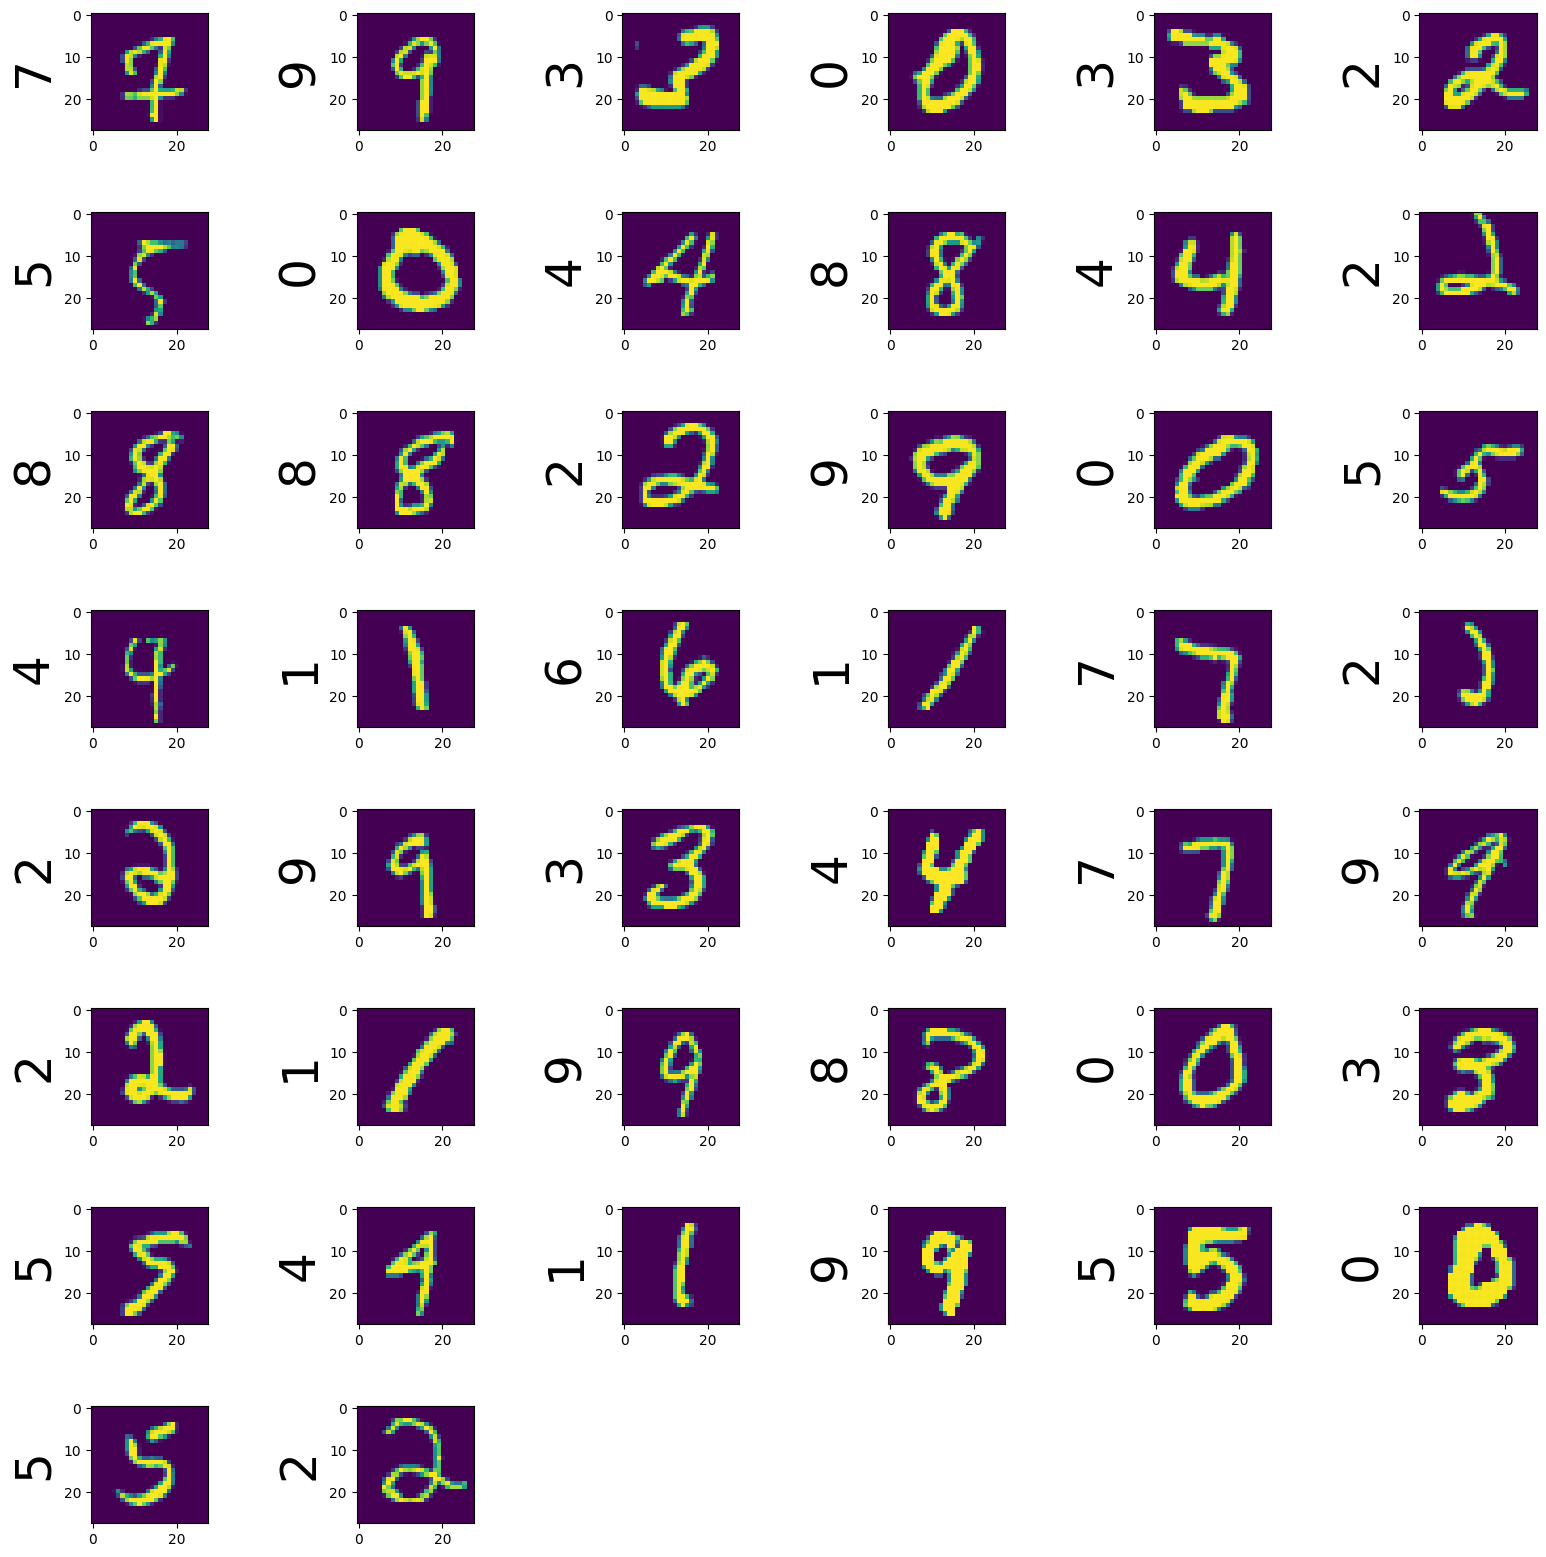

In [6]:
# Testing The Model
fig = plt.figure(figsize=(20, 20), dpi=100)
plt.subplots_adjust(hspace=0.7)
for i in range(1, 45):
    ax = plt.subplot(8, 6, i)
    x = choice(x_train)
    p = np.argmax(model.predict([[x]]))
    ax.imshow(x)
    ax.set_ylabel(str(p), fontsize=35)

In [7]:
# Save MOdel For Later Use

model.save("save_model")

In [8]:
# Load Model From Saved Location 

model.load_weights("save_model")